In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# **CLEANING DATASET**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/CS 4375 INTRO TO ML/CS 4375 FINAL PROJECT/diabetes_dataset__2019.csv")
df

df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [4]:
# Renaming columns with incorrect spelling

df.rename(columns={"Pregancies" : "Pregnancies", "UriationFreq" : "UrinationFrequency", "Pdiabetes" : "GestationDiabetes"}, inplace=True)
df

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,GestationDiabetes,UrinationFrequency,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


In [5]:
# getting total NA values for each column

df.isna().sum()

Age                    0
Gender                 0
Family_Diabetes        0
highBP                 0
PhysicallyActive       0
BMI                    4
Smoking                0
Alcohol                0
Sleep                  0
SoundSleep             0
RegularMedicine        0
JunkFood               0
Stress                 0
BPLevel                0
Pregnancies           42
GestationDiabetes      1
UrinationFrequency     0
Diabetic               1
dtype: int64

In [6]:
# for removing rows with NA values (BMI 4, GestationDiabetes 1, Diabetic 1)

na_indices = df[df['Diabetic'].isna() | df['GestationDiabetes'].isna() | df['BMI'].isna()].index.to_list()

print(na_indices)
df.drop(index= na_indices,inplace = True)

[113, 116, 121, 122, 134]


In [7]:
# checking if all rows with NA values were dropped

na_indices = df[df['Diabetic'].isna() | df['GestationDiabetes'].isna() | df['BMI'].isna()].index.to_list()

print(na_indices)

[]


In [8]:
df.info()

# Checking values of "Pregnancies"
print(df.Pregnancies.unique())
print(df['Pregnancies'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 947 entries, 0 to 951
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 947 non-null    object 
 1   Gender              947 non-null    object 
 2   Family_Diabetes     947 non-null    object 
 3   highBP              947 non-null    object 
 4   PhysicallyActive    947 non-null    object 
 5   BMI                 947 non-null    float64
 6   Smoking             947 non-null    object 
 7   Alcohol             947 non-null    object 
 8   Sleep               947 non-null    int64  
 9   SoundSleep          947 non-null    int64  
 10  RegularMedicine     947 non-null    object 
 11  JunkFood            947 non-null    object 
 12  Stress              947 non-null    object 
 13  BPLevel             947 non-null    object 
 14  Pregnancies         905 non-null    float64
 15  GestationDiabetes   947 non-null    object 
 16  UrinationFreq

In [9]:
# Changing NA values in "Pregnancies" to 0

df['Pregnancies'].fillna(value = 0.0, inplace= True)

print(df['Pregnancies'].value_counts())

# Changing type to int instead of float
df['Pregnancies'] = df['Pregnancies'].astype(int)
df['Pregnancies']


Pregnancies
0.0    792
2.0     63
3.0     60
1.0     28
4.0      4
Name: count, dtype: int64


0      0
1      0
2      0
3      0
4      0
      ..
947    0
948    0
949    0
950    0
951    2
Name: Pregnancies, Length: 947, dtype: int64

In [10]:
# Checking if we need to change any other values in dataset
for col in df:
  print(col)
  print(df[col].unique())

  # need to change
  # RegularMedicine ['no' 'yes' 'o']
  # BPLevel ['high' 'normal' 'low' 'Low' 'High' 'normal ']
  # GestationDiabetes ['0' 'yes' 'no']
  # Diabetic ['no' 'yes' ' no']


Age
['50-59' '40-49' 'less than 40' '60 or older']
Gender
['Male' 'Female']
Family_Diabetes
['no' 'yes']
highBP
['yes' 'no']
PhysicallyActive
['one hr or more' 'less than half an hr' 'none' 'more than half an hr']
BMI
[39. 28. 24. 23. 27. 21. 20. 26. 22. 15. 34. 30. 29. 18. 32. 31. 36. 38.
 40. 35. 19. 33. 17. 25. 42. 45.]
Smoking
['no' 'yes']
Alcohol
['no' 'yes']
Sleep
[ 8  6 10  7 11  9  4  5]
SoundSleep
[ 6  8 10  7 11  4  9  5  3  2  1  0]
RegularMedicine
['no' 'yes' 'o']
JunkFood
['occasionally' 'very often' 'often' 'always']
Stress
['sometimes' 'not at all' 'very often' 'always']
BPLevel
['high' 'normal' 'low' 'Low' 'High' 'normal ']
Pregnancies
[0 1 2 3 4]
GestationDiabetes
['0' 'yes' 'no']
UrinationFrequency
['not much' 'quite often']
Diabetic
['no' 'yes' ' no']


In [11]:
# original value counts before changes
changeCols = ["RegularMedicine", "BPLevel", "GestationDiabetes", "Diabetic"]
for col in changeCols:
  print(df[col].value_counts())

RegularMedicine
no     611
yes    335
o        1
Name: count, dtype: int64
BPLevel
normal     703
high       210
low         25
High         5
Low          3
normal       1
Name: count, dtype: int64
GestationDiabetes
0      932
yes     14
no       1
Name: count, dtype: int64
Diabetic
no     681
yes    265
 no      1
Name: count, dtype: int64


In [12]:
df["RegularMedicine"].replace('o', 'no', inplace =True)

df["BPLevel"].replace('High', 'high', inplace =True)
df["BPLevel"].replace('Low', 'low', inplace =True)
df["BPLevel"].replace('normal ', 'normal', inplace =True)

df["GestationDiabetes"].replace('0', 'no', inplace =True)
df["Diabetic"].replace(' no', 'no', inplace =True)

# checking if changes applied
changeCols = ["RegularMedicine", "BPLevel", "GestationDiabetes", "Diabetic"]
for col in changeCols:
  print(df[col].value_counts())


RegularMedicine
no     612
yes    335
Name: count, dtype: int64
BPLevel
normal    704
high      215
low        28
Name: count, dtype: int64
GestationDiabetes
no     933
yes     14
Name: count, dtype: int64
Diabetic
no     682
yes    265
Name: count, dtype: int64


In [13]:
# Changing Gender values
df['Gender'].replace(to_replace = ['Male', 'Female'], value = [0, 1], inplace = True)

# Changing Family_Diabetes
df['Family_Diabetes'].replace(to_replace = ['no', 'yes'], value = [0, 1], inplace = True)

# Changing highBP
df['highBP'].replace(to_replace = ['no', 'yes'], value = [0, 1], inplace = True)

# Changing Smoking
df['Smoking'].replace(to_replace = ['no', 'yes'], value = [0, 1], inplace = True)

# Changing Smoking
df['Alcohol'].replace(to_replace = ['no', 'yes'], value = [0, 1], inplace = True)

# Changing regular medicine
df['RegularMedicine'].replace(to_replace = ['no', 'yes'], value = [0, 1], inplace = True)

# Changing GestationDiabetes
df['GestationDiabetes'].replace(to_replace = ['no', 'yes'], value = [0, 1], inplace = True)

# Changing UrinationFrequency
df['UrinationFrequency'].replace(to_replace = ['not much', 'quite often'], value = [0, 1], inplace = True)

# Changing diabetic
df['Diabetic'].replace(to_replace = ['no', 'yes'], value = [0, 1], inplace = True)

df.info()
df


<class 'pandas.core.frame.DataFrame'>
Index: 947 entries, 0 to 951
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 947 non-null    object 
 1   Gender              947 non-null    int64  
 2   Family_Diabetes     947 non-null    int64  
 3   highBP              947 non-null    int64  
 4   PhysicallyActive    947 non-null    object 
 5   BMI                 947 non-null    float64
 6   Smoking             947 non-null    int64  
 7   Alcohol             947 non-null    int64  
 8   Sleep               947 non-null    int64  
 9   SoundSleep          947 non-null    int64  
 10  RegularMedicine     947 non-null    int64  
 11  JunkFood            947 non-null    object 
 12  Stress              947 non-null    object 
 13  BPLevel             947 non-null    object 
 14  Pregnancies         947 non-null    int64  
 15  GestationDiabetes   947 non-null    int64  
 16  UrinationFreq

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregnancies,GestationDiabetes,UrinationFrequency,Diabetic
0,50-59,0,0,1,one hr or more,39.0,0,0,8,6,0,occasionally,sometimes,high,0,0,0,0
1,50-59,0,0,1,less than half an hr,28.0,0,0,8,6,1,very often,sometimes,normal,0,0,0,0
2,40-49,0,0,0,one hr or more,24.0,0,0,6,6,0,occasionally,sometimes,normal,0,0,0,0
3,50-59,0,0,0,one hr or more,23.0,0,0,8,6,0,occasionally,sometimes,normal,0,0,0,0
4,40-49,0,0,0,less than half an hr,27.0,0,0,8,8,0,occasionally,sometimes,normal,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,0,1,0,more than half an hr,25.0,0,0,8,6,0,often,sometimes,normal,0,0,0,1
948,60 or older,0,1,1,more than half an hr,27.0,0,0,6,5,1,occasionally,sometimes,high,0,0,1,1
949,60 or older,0,0,1,none,23.0,0,0,6,5,1,occasionally,sometimes,high,0,0,0,0
950,60 or older,0,0,1,less than half an hr,27.0,0,1,6,5,1,occasionally,very often,high,0,0,0,0


In [14]:
# Getting dummy indicator variables from categorical variables

# Age
Age_dummies = pd.get_dummies(df['Age'], dtype = int, prefix='Age')
df.drop(['Age'], axis = 1, inplace=True)
df = pd.concat([df, Age_dummies], axis = 1)

In [15]:
# Physically Active
PhysicallyActive_dummies = pd.get_dummies(df['PhysicallyActive'], dtype = int, prefix='PhysicallyActive')
df.drop(['PhysicallyActive'], axis = 1, inplace=True)
df = pd.concat([df, PhysicallyActive_dummies], axis = 1)

In [16]:
# JunkFood
JunkFood_dummies = pd.get_dummies(df['JunkFood'], dtype = int, prefix='JunkFood')
df.drop(['JunkFood'], axis = 1, inplace=True)
df = pd.concat([df, JunkFood_dummies], axis = 1)

In [17]:
# Stress
Stress_dummies = pd.get_dummies(df['Stress'], dtype = int, prefix='Stress')
df.drop(['Stress'], axis = 1, inplace=True)
df = pd.concat([df, Stress_dummies], axis = 1)

In [18]:
# BPLevel
BPLevel_dummies = pd.get_dummies(df['BPLevel'], dtype = int, prefix='BPLevel')
df.drop(['BPLevel'], axis = 1, inplace=True)
df = pd.concat([df, BPLevel_dummies], axis = 1)

In [19]:
# dropping highBP
df.drop(['highBP'], axis = 1, inplace=True)

In [20]:
# Checking if there are any males that have values other than 0 for Pregnancies and GestationDiabetes

male_and_gestation = df[(df['Gender']==0) & (df['GestationDiabetes']==1)]  # found one at index 115, need to remove
df.drop((male_and_gestation).index, inplace = True)

### 12 OBSERVATIONS WITH MALE AND PREGNANT --------------------------------------------------------------------------------------------------------DECIDE TO DELETE OR NOT
df[(df['Gender']==0) & (df['Pregnancies']!=0)]

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, 0 to 951
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 946 non-null    int64  
 1   Family_Diabetes                        946 non-null    int64  
 2   BMI                                    946 non-null    float64
 3   Smoking                                946 non-null    int64  
 4   Alcohol                                946 non-null    int64  
 5   Sleep                                  946 non-null    int64  
 6   SoundSleep                             946 non-null    int64  
 7   RegularMedicine                        946 non-null    int64  
 8   Pregnancies                            946 non-null    int64  
 9   GestationDiabetes                      946 non-null    int64  
 10  UrinationFrequency                     946 non-null    int64  
 11  Diabetic   

# **TRAIN/TEST SPLIT**

In [21]:
X = df.drop('Diabetic', axis=1)
y = df['Diabetic']

In [22]:
# Train - Test Split

# random_state=0 allows for data to be split the same way each time (reproducible)
# stratify=y_train ---> training and testing data both have approx. same portion of diabetic and non-diabetic patients.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify= y)

# split for training and validation data
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0, stratify=y_train)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# print("With Standard Scaler X_Train")
# print(X_train)

X_test = scaler.fit_transform(X_test)
# print("\nWith Standard Scaler X_Test")
# print(X_test)

X_validation = scaler.fit_transform(X_validation)
# print("\nWith Standard Scaler X_validation")
# print(X_validation)

print(y_train.value_counts())
print(y_validation.value_counts())
print(y_test.value_counts())
X_train.shape , X_test.shape , X_validation.shape


Diabetic
0    435
1    169
Name: count, dtype: int64
Diabetic
0    109
1     43
Name: count, dtype: int64
Diabetic
0    137
1     53
Name: count, dtype: int64


((604, 30), (190, 30), (152, 30))

# **SVM**


## **rbf Kernel**
 the RBF kernel is often used in classification tasks with a large number of features.

In [23]:
# RBF KERNEL

# training model with training data
model = SVC(kernel = "rbf")
model.fit(X_train, y_train)


SVC()

### VALIDATION DATA (BEFORE GRIDSEARCH)

Accuracy Score:  0.9144736842105263

Classification report for validation set: 

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       109
           1       0.92      0.77      0.84        43

    accuracy                           0.91       152
   macro avg       0.92      0.87      0.89       152
weighted avg       0.91      0.91      0.91       152



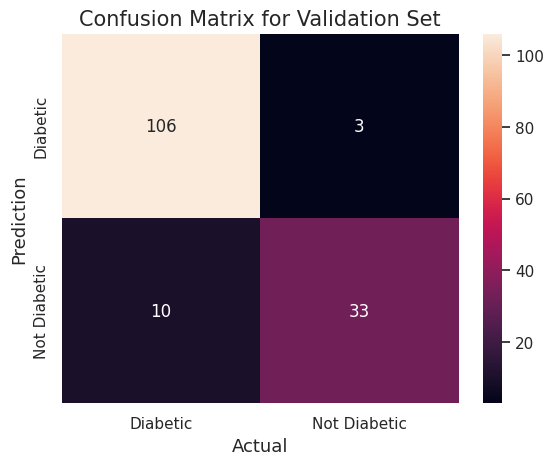

In [24]:
# Predictions for Validation Data

y_pred_validation = model.predict(X_validation)

# confusion matrix
validation_matrix = confusion_matrix(y_validation, y_pred_validation)
print("Accuracy Score: ", accuracy_score(y_validation, y_pred_validation))

print("\nClassification report for validation set: \n")
print(classification_report(y_validation, y_pred_validation))

sns.heatmap(validation_matrix,
            annot=True,
            fmt='g',
            xticklabels=['Diabetic', 'Not Diabetic'],
            yticklabels=['Diabetic', 'Not Diabetic'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix for Validation Set', fontsize=15)
plt.show()


### GRIDSEARCH

In [25]:
model = SVC(kernel = "rbf")
model.fit(X_train, y_train)

SVC()

In [26]:
param_grid = [
  {'C': [0.1,1,10,100], 'gamma': [0.01,0.001], 'kernel': ['rbf','sigmoid']},
 ]

In [27]:
grid = GridSearchCV(model,param_grid=param_grid, cv=10, n_jobs=-1)

grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.001],
                          'kernel': ['rbf', 'sigmoid']}])

In [28]:
# not really sure what to do w this tbh

def cparameter(i):
    model = SVC(kernel='rbf',C=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, y_pred)
    print(accuracy_score(y_test, y_pred))
    print (matrix)

In [29]:
l = [0.1,1,10]
for i in l:
    print("\nfor the value of c = ", i)
    cparameter(i)


for the value of c =  0.1
0.868421052631579
[[128   9]
 [ 16  37]]

for the value of c =  1
0.8631578947368421
[[126  11]
 [ 15  38]]

for the value of c =  10
0.868421052631579
[[126  11]
 [ 14  39]]


0.9407894736842105
Classification report after tuning parameters: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       109
           1       0.95      0.84      0.89        43

    accuracy                           0.94       152
   macro avg       0.94      0.91      0.92       152
weighted avg       0.94      0.94      0.94       152

Accuracy Score:  0.9407894736842105

True Positives(TP) =  107

True Negatives(TN) =  36

False Positives(FP) =  2

False Negatives(FN) =  7


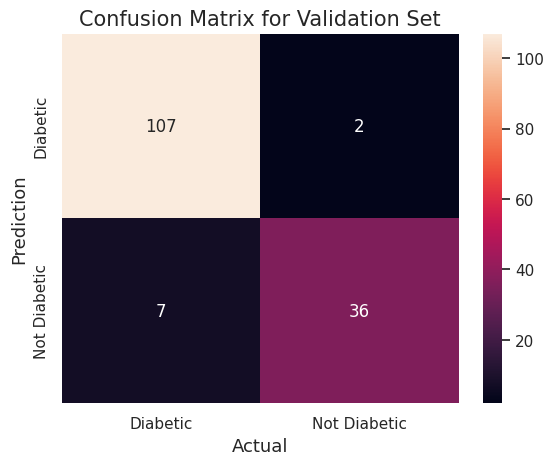

In [30]:
y_pred_validation_grid = grid.predict(X_validation)
# print(y_pred_validation_grid)

# confusion matrix
validation_matrix = confusion_matrix(y_validation, y_pred_validation_grid)

print(accuracy_score(y_validation, y_pred_validation_grid))

print("Classification report after tuning parameters: ")
print(classification_report(y_validation, y_pred_validation_grid))

print("Accuracy Score: ", accuracy_score(y_validation, y_pred_validation_grid))

print('\nTrue Positives(TP) = ', validation_matrix[0,0])
print('\nTrue Negatives(TN) = ', validation_matrix[1,1])
print('\nFalse Positives(FP) = ', validation_matrix[0,1])
print('\nFalse Negatives(FN) = ', validation_matrix[1,0])

sns.heatmap(validation_matrix,
            annot=True,
            fmt='g',
            xticklabels=['Diabetic', 'Not Diabetic'],
            yticklabels=['Diabetic', 'Not Diabetic'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix for Validation Set', fontsize=15)
plt.show()

In [31]:
print("Best Score: ", grid.best_score_)
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best Score:  0.9453005464480873
Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, gamma=0.01)


### TESTING DATA

Classification Report for Test Set: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       137
           1       0.92      0.91      0.91        53

    accuracy                           0.95       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.95      0.95      0.95       190

Accuracy Score:  0.9526315789473684

True Positives(TP) =  133

True Negatives(TN) =  48

False Positives(FP) =  4

False Negatives(FN) =  5


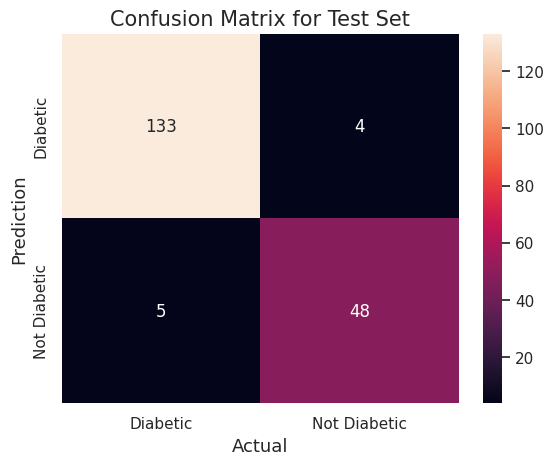

In [32]:
y_pred_test = grid.predict(X_test)

print("Classification Report for Test Set: ")
print(classification_report(y_test, y_pred_test))

# confusion matrix
test_matrix = confusion_matrix(y_test, y_pred_test)

print("Accuracy Score: ", accuracy_score(y_test, y_pred_test))

print('\nTrue Positives(TP) = ', test_matrix[0,0])
print('\nTrue Negatives(TN) = ', test_matrix[1,1])
print('\nFalse Positives(FP) = ', test_matrix[0,1])
print('\nFalse Negatives(FN) = ', test_matrix[1,0])

sns.heatmap(test_matrix,
            annot=True,
            fmt='g',
            xticklabels=['Diabetic', 'Not Diabetic'],
            yticklabels=['Diabetic', 'Not Diabetic'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix for Test Set', fontsize=15)
plt.show()